In [1]:
import sys
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D
import numpy
import os
import glob

sys.path.append('/src')


In [2]:
from src.data import download_dataset
download_dataset()


Data already downloaded


In [3]:
from src.data import LogisticRegressionDataSet
dataset = LogisticRegressionDataSet([0.75, 0.125, 0.125], 20)

In [4]:
print('train on user indices: ', dataset.train_idxs)
print('validate on user indices: ', dataset.val_idxs)
print('test on user indices: ', dataset.test_idxs)

train on user indices:  [6 0 4 3 7 1]
validate on user indices:  [5]
test on user indices:  [2]


In [5]:
norm_val = False

data, cls, _ = dataset.get_padded_data_points_flat('train', normalize=norm_val)
data_val, cls_val, _ = dataset.get_padded_data_points_flat('val', normalize=norm_val)
data_test, cls_test, _ = dataset.get_padded_data_points_flat('test', normalize=norm_val)

In [6]:
print(data.shape, cls.shape)
print(data_val.shape, cls_val.shape)
print(data_test.shape, cls_test.shape)

(3360, 945) (3360,)
(560, 945) (560,)
(560, 945) (560,)


In [7]:
from src.models import LogisticRegressionSklearn

clf = LogisticRegressionSklearn(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=100)
clf.fit(data, cls)

Using TensorFlow backend.
/home/neha/Documents/python-env/gesture-recog/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionSklearn(C=1.0, class_weight=None, dual=False,
             fit_intercept=True, intercept_scaling=1, max_iter=100,
             multi_class='multinomial', n_jobs=None, penalty='l2',
             random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
             warm_start=False)

In [8]:
print('Training score: ', clf.score(data, cls))
print('Val score: ', clf.score(data_val, cls_val))
print('Test score: ', clf.score(data_test, cls_test))

Training score:  0.9800595238095238
Val score:  0.5428571428571428
Test score:  0.7660714285714286


In [9]:
from src.models import LogisticRegressionNumpy

clf = LogisticRegressionNumpy(max_iter=100, num_classes=8, num_features=data.shape[1], lr=0.5, reg=0.1)
scores, log_losses, scores_val, log_losses_val = clf.fit(data, cls, data_val, cls_val)

In [10]:
print('Training score: ', clf.score(data, cls))
print('Val score: ', clf.score(data_val, cls_val))
print('Test score: ', clf.score(data_test, cls_test))

Training score:  0.6482142857142857
Val score:  0.4517857142857143
Test score:  0.4785714285714286


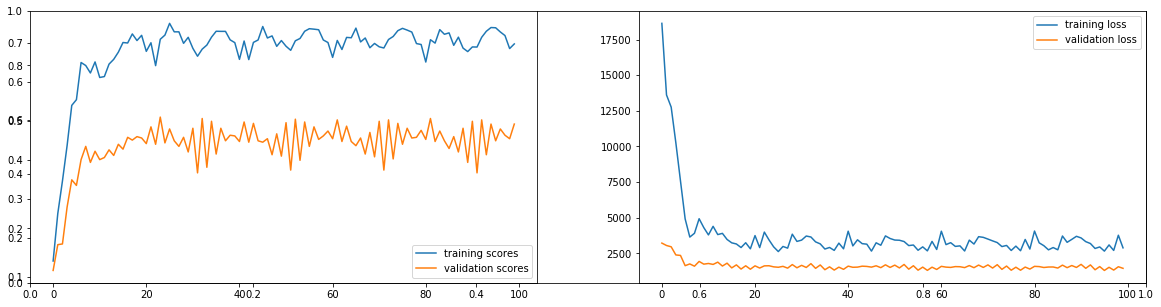

In [11]:
import numpy as np
fig = plt.figure(figsize=(20,5))
ax = plt.axes()

ax1 = fig.add_subplot(121);
ax1.plot(scores, label='training scores')
ax1.plot(scores_val, label='validation scores')
ax1.legend()

ax2 = fig.add_subplot(122);
ax2.plot(log_losses, label='training loss')
ax2.plot(log_losses_val, label='validation loss')
ax2.legend()

In [12]:
from src.models import LogisticRegressionNumpy

clf = LogisticRegressionNumpy(max_iter=100, num_classes=8, num_features=data.shape[1], lr=0.5, reg=0.5)
scores, log_losses, scores_val, log_losses_val = clf.fit(data, cls, data_val, cls_val, solver='lbfgs', lbfgs_m=30)

In [13]:
print('Training score: ', clf.score(data, cls))
print('Val score: ', clf.score(data_val, cls_val))
print('Test score: ', clf.score(data_test, cls_test))

Training score:  0.837202380952381
Val score:  0.5428571428571428
Test score:  0.7875


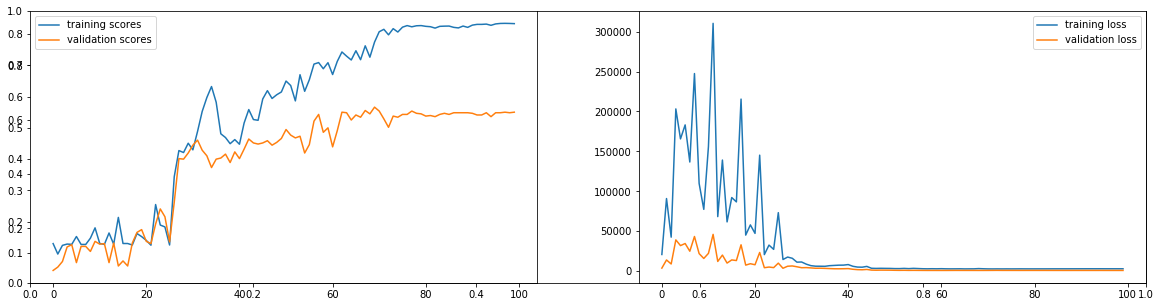

In [14]:
import numpy as np
fig = plt.figure(figsize=(20,5))
ax = plt.axes()

ax1 = fig.add_subplot(121);
ax1.plot(scores, label='training scores')
ax1.plot(scores_val, label='validation scores')
ax1.legend()

ax2 = fig.add_subplot(122);
ax2.plot(log_losses, label='training loss')
ax2.plot(log_losses_val, label='validation loss')
ax2.legend()

In [15]:
from src.models import BidirectionalRNNKeras

clf = BidirectionalRNNKeras(num_classes=8, num_features=data.shape[1])
clf.fit(data, cls, data_val, cls_val, epochs=10, batch_size=20)

Train on 3360 samples, validate on 560 samples
Epoch 1/10
3360/3360 [==============================] - 1s 382us/step - loss: 1.4170 - acc: 0.6435 - val_loss: 1.8144 - val_acc: 0.5000
Epoch 2/10
3360/3360 [==============================] - 0s 113us/step - loss: 1.0097 - acc: 0.8152 - val_loss: 1.7122 - val_acc: 0.5411
Epoch 3/10
3360/3360 [==============================] - 0s 117us/step - loss: 0.8154 - acc: 0.8729 - val_loss: 1.6410 - val_acc: 0.5625
Epoch 4/10
3360/3360 [==============================] - 0s 117us/step - loss: 0.6808 - acc: 0.8994 - val_loss: 1.6403 - val_acc: 0.5571
Epoch 5/10
3360/3360 [==============================] - 0s 114us/step - loss: 0.5817 - acc: 0.9134 - val_loss: 1.6179 - val_acc: 0.5625
Epoch 6/10
3360/3360 [==============================] - 0s 114us/step - loss: 0.5058 - acc: 0.9247 - val_loss: 1.6350 - val_acc: 0.5571
Epoch 7/10
3360/3360 [==============================] - 0s 118us/step - loss: 0.4446 - acc: 0.9342 - val_loss: 1.6924 - val_acc: 0.5250
E

In [16]:
print('Training score: ', clf.score(data, cls)[1])
print('Val score: ', clf.score(data_val, cls_val)[1])
print('Test score: ', clf.score(data_test, cls_test)[1])

3360/3360 [==============================] - 0s 36us/step
Training score:  0.9568452380952381
560/560 [==============================] - 0s 40us/step
Val score:  0.5571428571428572
560/560 [==============================] - 0s 44us/step
Test score:  0.8017857142857143


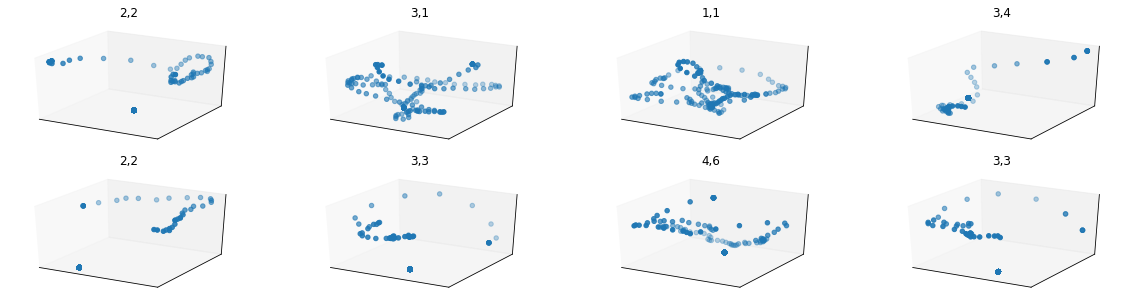

In [18]:
import numpy as np
 
fig = plt.figure(figsize=(20, 5))

d = data_test
c = cls_test
d = data_val
c = cls_val

rd_idxs = np.random.choice(np.arange(d.shape[0]), 8, False)
prd_cls = clf.predict(d)
d = d.reshape(d.shape[0], -1, 3)

for i in range(8):
    idx = rd_idxs[i]
    ax = fig.add_subplot(2, 4, i+1, projection='3d')
    ax.scatter3D(d[idx,:,0], d[idx,:,1], d[idx,:,2])
    ax.title.set_text(str(prd_cls[idx])+','+str(c[idx]))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

plt.show()

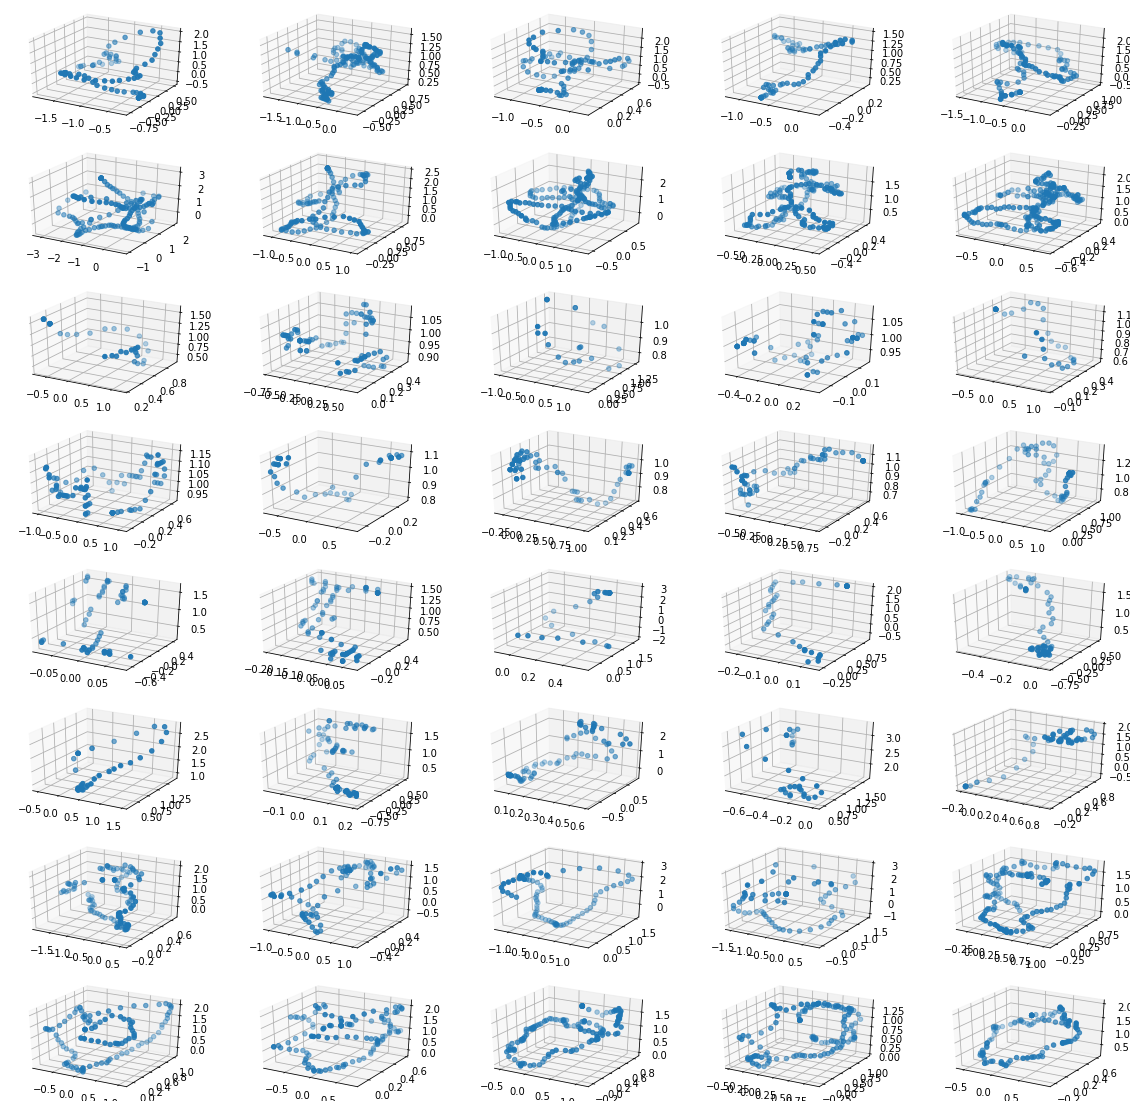

In [17]:
import src.config as config
fig = plt.figure(figsize=(20, 20))

split = 'train'

for i in range(config.Num.classes.value):
    for j in range(5):
        dp = dataset.get_random_data_point_for_class(split, i)
        ax = fig.add_subplot(8, 5, (5*i)+j+1, projection='3d')
        ax.scatter3D(dp[:,0], dp[:,1], dp[:,2])

plt.show()

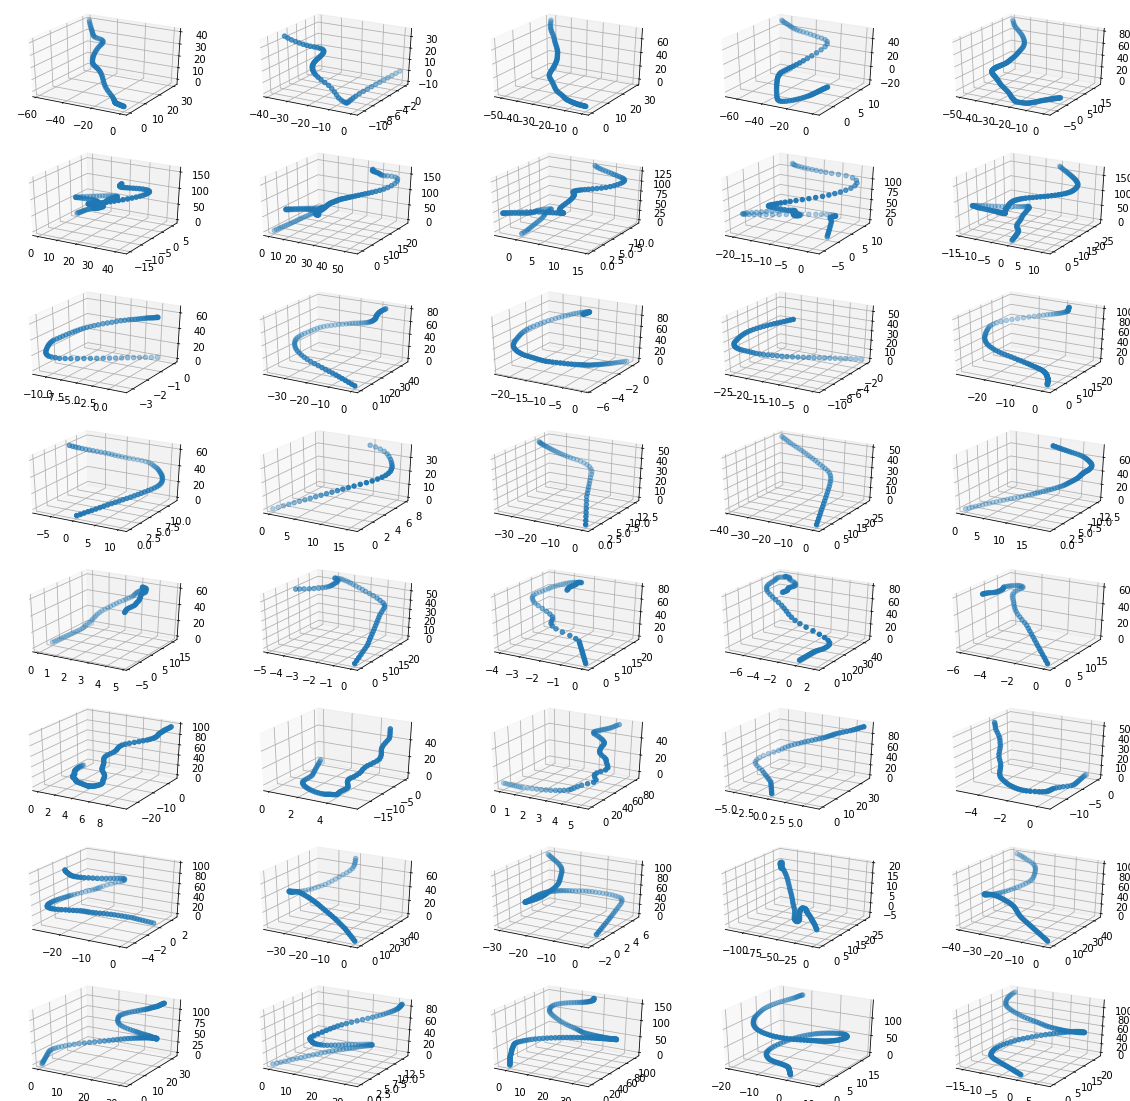

In [7]:
import src.config as config
fig = plt.figure(figsize=(20, 20))

split = 'train'

for i in range(config.Num.classes.value):
    for j in range(5):
        dp = dataset.get_random_data_point_for_class(split, i)
        dp = dataset.get_data_point_velocity(dp)
        ax = fig.add_subplot(8, 5, (5*i)+j+1, projection='3d')
        ax.scatter3D(dp[:,0], dp[:,1], dp[:,2])

plt.show()

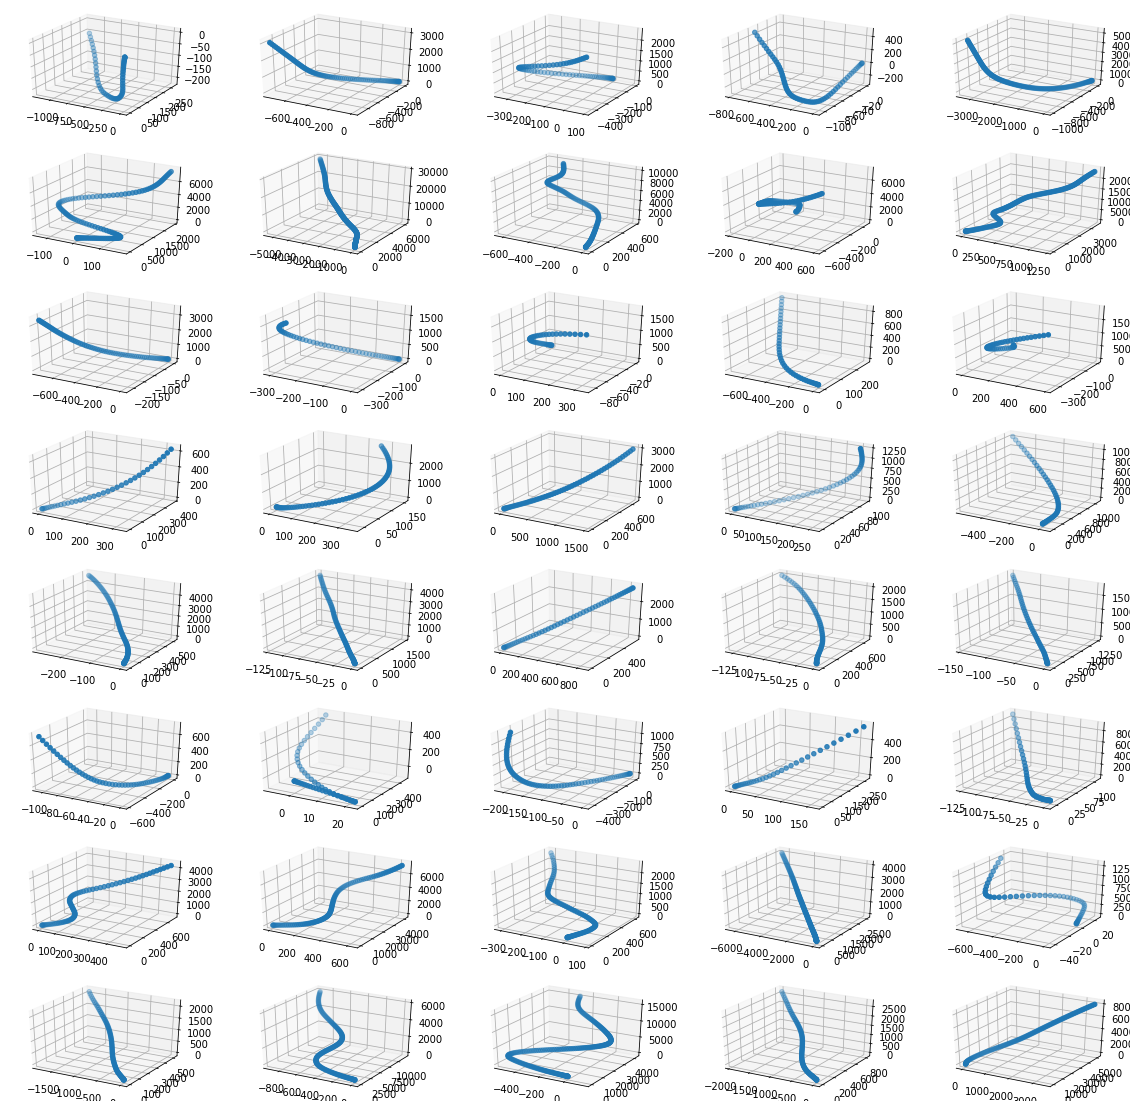

In [8]:
import src.config as config
fig = plt.figure(figsize=(20, 20))

split = 'train'

for i in range(config.Num.classes.value):
    for j in range(5):
        dp = dataset.get_random_data_point_for_class(split, i)
        dp = dataset.get_data_point_pos(dp)
        ax = fig.add_subplot(8, 5, (5*i)+j+1, projection='3d')
        ax.scatter3D(dp[:,0], dp[:,1], dp[:,2])

plt.show()

In [ ]:
# Test Code
from sklearn.datasets import load_iris
from src.models import LogisticRegressionNumpy

X, y = load_iris(return_X_y=True)
clf = LogisticRegressionNumpy(max_iter=400, num_classes=3, num_features=X.shape[1], lr=0.001)

clf.fit(X, y)

clf.score(X, y)